<a href="https://colab.research.google.com/github/GauthamRajgopal/Deep-Learning/blob/master/DeepLearning_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Check Python Version
import sys
sys.version
sys.version_info
import platform
print(platform.python_version())

3.6.8


In [0]:
# Check Keras and Tensorflow environment
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

tensorflow: 1.14.0
keras: 2.2.5


Using TensorFlow backend.


In [0]:
# import libaries
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
%matplotlib inline
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

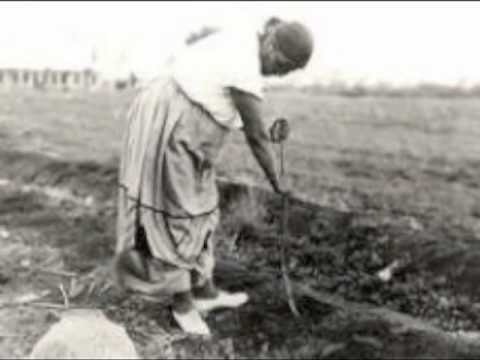

In [0]:
# What this case is all about?
from IPython.display import YouTubeVideo
YouTubeVideo("pN4HqWRybwk")

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivitiy="all" 

In [0]:
# Import data
df = pd.read_csv('diabetes.csv')
 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 
# Investigate Data
type(df)
df.size
df.shape
df.head()
df.tail()

pandas.core.frame.DataFrame

6912

(768, 9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


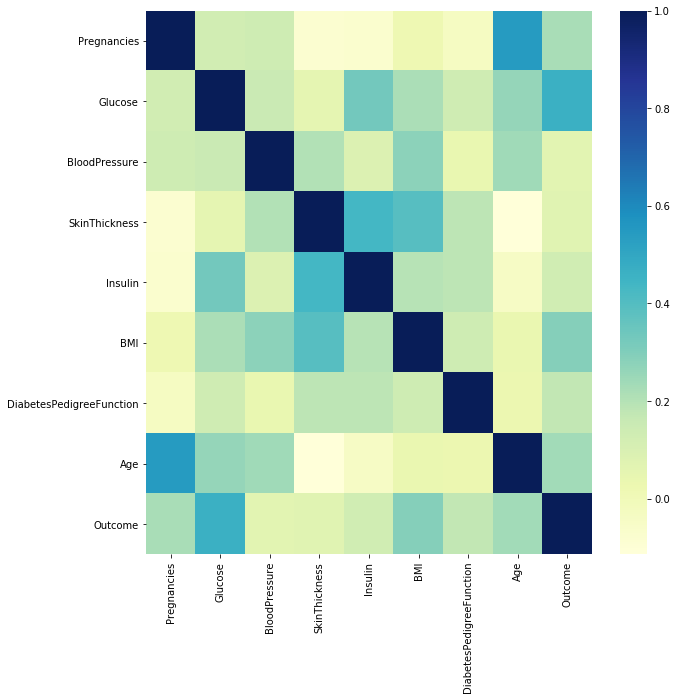

In [0]:
x = df.corr()
x
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap="YlGnBu")
plt.show();

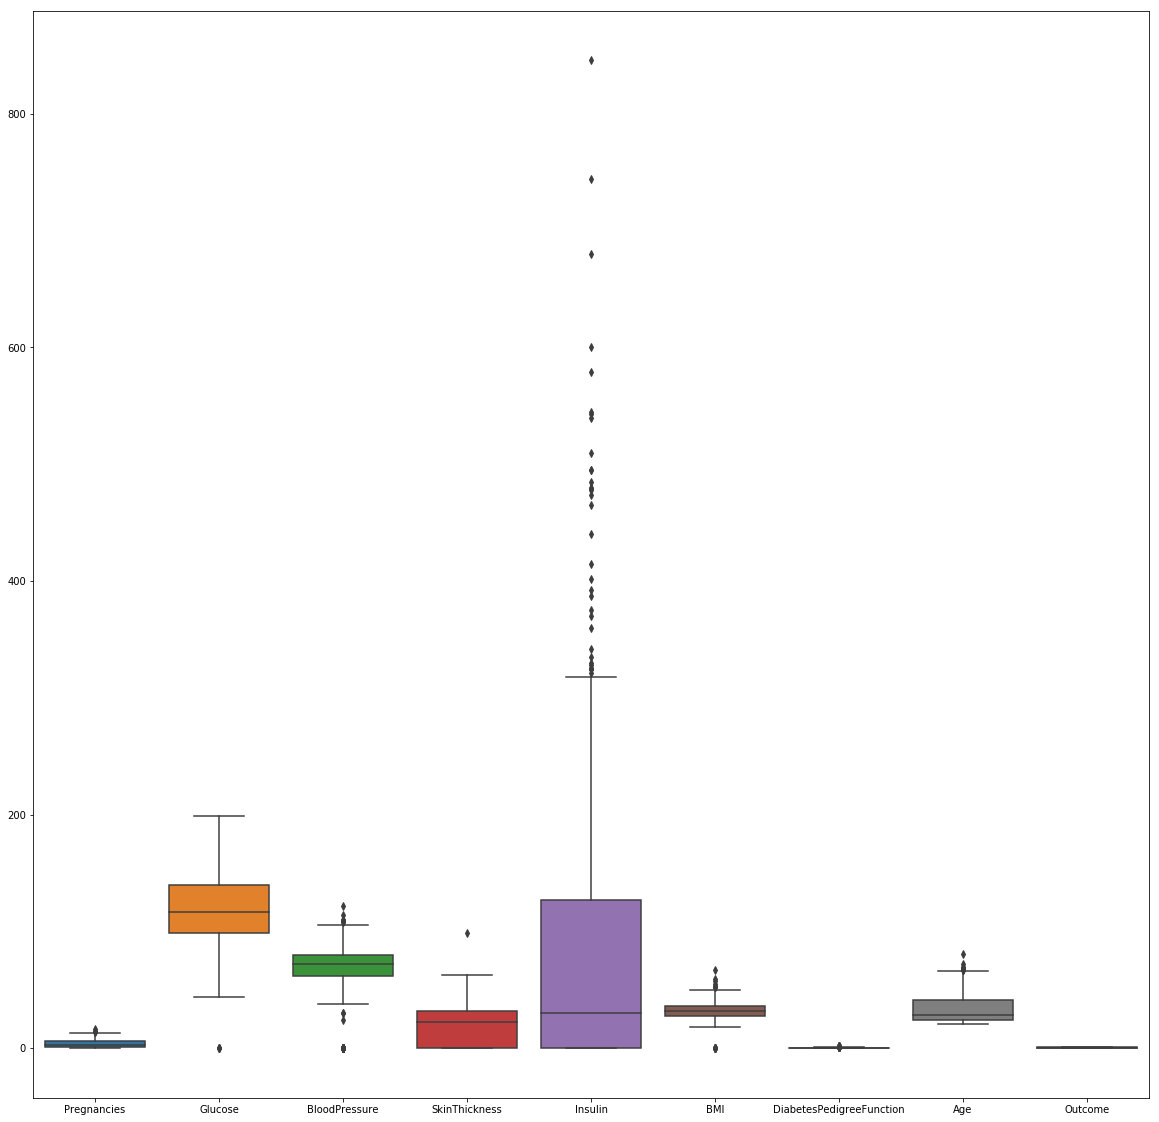

In [0]:
plt.subplots(figsize=(20,20))
sns.boxplot(data=df)
plt.show();

In [0]:
# Create Features and Labels and Standardize data
Y = df.iloc[:,8]
X= df.iloc[:,0:8]
std = StandardScaler()
X_Features= std.fit_transform(X)
# Create train and test data 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)
 

(576, 8)

(192, 8)

(576,)

(192,)

numpy.ndarray

In [0]:
# Build Deep Learning Model
model = Sequential()
model.add(Dense(512, input_dim =8))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

train_x = np.array(train_x)
train_y = np.array(train_y)
# Fit the model
model.fit(train_x,train_y, epochs=10, batch_size=64)
 

Epoch 1/10
576/576 [==============================] - 1s 981us/step - loss: 0.6129 - acc: 0.6701
Epoch 2/10
576/576 [==============================] - 0s 118us/step - loss: 0.5049 - acc: 0.7483
Epoch 3/10
576/576 [==============================] - 0s 99us/step - loss: 0.4705 - acc: 0.7552
Epoch 4/10
576/576 [==============================] - 0s 123us/step - loss: 0.4714 - acc: 0.7639
Epoch 5/10
576/576 [==============================] - 0s 111us/step - loss: 0.4577 - acc: 0.7830
Epoch 6/10
576/576 [==============================] - 0s 99us/step - loss: 0.4527 - acc: 0.7743
Epoch 7/10
576/576 [==============================] - 0s 97us/step - loss: 0.4504 - acc: 0.7743
Epoch 8/10
576/576 [==============================] - 0s 111us/step - loss: 0.4562 - acc: 0.7743
Epoch 9/10
576/576 [==============================] - 0s 96us/step - loss: 0.4385 - acc: 0.7743
Epoch 10/10
576/576 [==============================] - 0s 92us/step - loss: 0.4329 - acc: 0.7917


In [0]:
# evaluate the model
scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 0s 121us/step

acc: 80.73%


In [0]:
classes = model.predict_classes(test_x, batch_size=32, verbose=0)
print (classes.size)
print('Positive Cases in Test Data:', test_y[test_y == 1].shape[0])
print('Neagtive Cases in Test Data:', test_y[test_y == 0].shape[0])
print()
print()
print ('Accuracy Score')
print (metrics.accuracy_score(test_y, classes))
print()
print()
auc = metrics.roc_auc_score(test_y,classes)
print ('AUC')
print (auc)
print()
print()
print ('Precision/Recall Metrics')
print (metrics.classification_report(test_y,classes))

192
Positive Cases in Test Data: 69
Neagtive Cases in Test Data: 123


Accuracy Score
0.8072916666666666


AUC
0.7732414280664546


Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       123
           1       0.78      0.65      0.71        69

    accuracy                           0.81       192
   macro avg       0.80      0.77      0.78       192
weighted avg       0.80      0.81      0.80       192



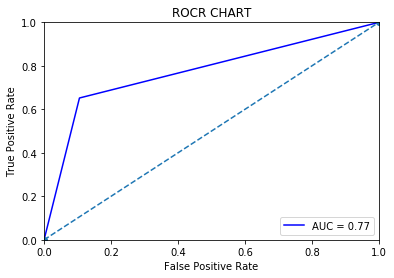

In [0]:
# ROC Chart
fpr, tpr, th= roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


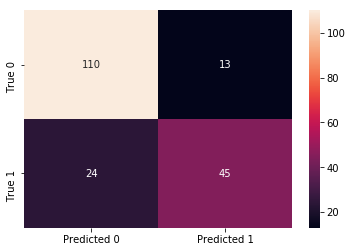

In [0]:
print ('Confusion Matrix')
cf=  metrics.confusion_matrix(test_y,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();